# **DATA PREPARATION FOR GEN DF**

# Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector

# Read The Data

# **Train DataSet**

In [2]:
# loading the datset
train = pd.read_csv("../dataset/train.csv")
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


# Features Selection

In [3]:
# DROP UNNECESSARY COLUMNS
train.drop("Patient Id",axis=1,inplace=True)
train.drop("Family Name",axis=1,inplace=True)
train.drop("Patient First Name",axis=1,inplace=True)
train.drop("Father's name",axis=1,inplace=True)
train.drop("Institute Name",axis=1,inplace=True)
train.drop("Location of Institute",axis=1,inplace=True)
train.drop("Place of birth",axis=1,inplace=True)
train.drop("Parental consent",axis=1,inplace=True)
train.drop("Test 1",axis=1,inplace=True)
train.drop("Test 2",axis=1,inplace=True)
train.drop("Test 3",axis=1,inplace=True)
train.drop("Test 5",axis=1,inplace=True)

In [4]:
train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


# Rename columns

In [5]:
train.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side","Inherited from father":"Inherited_from_father",
                    "Maternal gene":"Maternal_gene","Paternal gene":"Paternal_gene","Blood cell count (mcL)":"Blood_cell_count(mcL)",
                    "Mother's age":"Mother_Age","Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min","Heart Rate (rates/min":"Heart_Rates","Follow-up":"Follow_Up", "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect","Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness","H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse","Assisted conception IVF/ART":"Assisted_Conception", "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion","Birth defects":"Birth_Defects","Test 4":"Test_4",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell","Blood test result":"Blood_Test_Result",
                    "Symptom 1":"Symptom_1","Symptom 2":"Symptom_2","Symptom 3":"Symptom_3","Symptom 4":"Symptom_4",
                    "Symptom 5":"Symptom_5","Genetic Disorder":"Genetic_Disorder","Disorder Subclass":"Disorder_Subclass"},inplace=True)

# Check For **Dublicates**

In [6]:
train.duplicated().sum()

np.int64(0)

# Check For **Nulls**

In [7]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Mother_Age                      27.333243
Father_Age                      27.106824
Autopsy_Birth_Defect            19.888602
Maternal_gene                   12.724720
Symptom_2                       10.062039
Substance_Abuse                  9.939773
Gender                           9.840149
History_Previous_Pregnancies     9.835620
Disorder_Subclass                9.817507
Follow_Up                        9.808450
Previous_Abortion                9.790336
Symptom_1                        9.758638
Birth_Defects                    9.754109
Symptom_5                        9.749581
Radiation_Exposure               9.749581
Maternal_Illness                 9.745053
Respiratory_Rate_Breaths_Min     9.731468
White_Blood_Cell                 9.726939
Genetic_Disorder                 9.717883
Blood_Test_Result                9.713354
Test_4                           9.690712
Birth_Asphyxia                   9.686184
Assisted_Conception              9.609202
Folic_Acid                       9

## Replacing to **NAN**

In [8]:
train["Birth_Asphyxia"] = train["Birth_Asphyxia"].replace("No record",np.nan)
train["Birth_Asphyxia"] = train["Birth_Asphyxia"].replace("Not available",np.nan)

train["Autopsy_Birth_Defect"] = train["Autopsy_Birth_Defect"].replace("Not applicable",np.nan)

train["Radiation_Exposure"] = train["Radiation_Exposure"].replace("Not applicable",np.nan)
train["Radiation_Exposure"] = train["Radiation_Exposure"].replace("-",np.nan)

train["Substance_Abuse"] = train["Substance_Abuse"].replace("Not applicable",np.nan)
train["Substance_Abuse"] = train["Substance_Abuse"].replace("-",np.nan)

In [9]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Autopsy_Birth_Defect            70.076529
Birth_Asphyxia                  54.942716
Radiation_Exposure              54.784223
Substance_Abuse                 54.680071
Mother_Age                      27.333243
Father_Age                      27.106824
Maternal_gene                   12.724720
Symptom_2                       10.062039
Gender                           9.840149
History_Previous_Pregnancies     9.835620
Disorder_Subclass                9.817507
Follow_Up                        9.808450
Previous_Abortion                9.790336
Symptom_1                        9.758638
Birth_Defects                    9.754109
Symptom_5                        9.749581
Maternal_Illness                 9.745053
Respiratory_Rate_Breaths_Min     9.731468
White_Blood_Cell                 9.726939
Genetic_Disorder                 9.717883
Blood_Test_Result                9.713354
Test_4                           9.690712
Assisted_Conception              9.609202
Folic_Acid                       9

In [10]:
train.drop("Autopsy_Birth_Defect",axis=1,inplace=True)
train.drop("Birth_Asphyxia",axis=1,inplace=True)
train.drop("Radiation_Exposure",axis=1,inplace=True)
train.drop("Substance_Abuse",axis=1,inplace=True)

In [11]:
train = train.dropna(subset=['Test_4'])

# Filling Null values

In [12]:
# Filling a numeric columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric_cols = train.select_dtypes(include='number').columns
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])


In [13]:
# Filling a Categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = train.select_dtypes(exclude='number').columns
categorical_cols = [c for c in categorical_cols if c not in ['Genetic_Disorder', 'Disorder_Subclass']]
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])

In [14]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Disorder_Subclass               9.306524
Genetic_Disorder                9.296495
Inherited_from_father           0.000000
Genes_Mother_Side               0.000000
Patient_Age                     0.000000
Blood_cell_count(mcL)           0.000000
Mother_Age                      0.000000
Father_Age                      0.000000
Status                          0.000000
Respiratory_Rate_Breaths_Min    0.000000
Heart_Rates                     0.000000
Maternal_gene                   0.000000
Paternal_gene                   0.000000
Follow_Up                       0.000000
Test_4                          0.000000
Gender                          0.000000
Folic_Acid                      0.000000
History_Previous_Pregnancies    0.000000
Previous_Abortion               0.000000
Maternal_Illness                0.000000
Assisted_Conception             0.000000
White_Blood_Cell                0.000000
Birth_Defects                   0.000000
Blood_Test_Result               0.000000
Symptom_1       

#Filling missing values in our target column

In [15]:
def fill_Genetic_Disorder(row):
    if pd.isnull(row['Genetic_Disorder']):
        if row['Disorder_Subclass'] == "Leber's hereditary op":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Cystic fibrosis":
            return 'Single-gene inheritance diseases'
        elif row['Disorder_Subclass'] == "Diabetes":
            return 'Multifactorial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Leigh syndrome":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Cancer":
            return 'Multifactorial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Tay-Sachs":
            return 'Single-gene inheritance diseases'
        elif row['Disorder_Subclass'] == "Mitochondrial myopathy":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Hemochromatosis":
            return 'Single-gene inheritance diseases'
        elif row['Disorder_Subclass'] == "Leber's hereditary optic neuropathy":
            return 'Mitochondrial genetic inheritance disorders'
        elif row['Disorder_Subclass'] == "Alzheimer's":
            return 'Multifactorial genetic inheritance disorders'
    return row['Genetic_Disorder']

train['Genetic_Disorder'] = train.apply(fill_Genetic_Disorder, axis=1)


In [16]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Disorder_Subclass               9.306524
Genetic_Disorder                1.203430
Inherited_from_father           0.000000
Genes_Mother_Side               0.000000
Patient_Age                     0.000000
Blood_cell_count(mcL)           0.000000
Mother_Age                      0.000000
Father_Age                      0.000000
Status                          0.000000
Respiratory_Rate_Breaths_Min    0.000000
Heart_Rates                     0.000000
Maternal_gene                   0.000000
Paternal_gene                   0.000000
Follow_Up                       0.000000
Test_4                          0.000000
Gender                          0.000000
Folic_Acid                      0.000000
History_Previous_Pregnancies    0.000000
Previous_Abortion               0.000000
Maternal_Illness                0.000000
Assisted_Conception             0.000000
White_Blood_Cell                0.000000
Birth_Defects                   0.000000
Blood_Test_Result               0.000000
Symptom_1       

In [17]:
train = train.dropna(subset=['Genetic_Disorder'])

In [18]:
(train.isnull().sum()/len(train)*100).sort_values(ascending=False)

Disorder_Subclass               8.201797
Genes_Mother_Side               0.000000
Inherited_from_father           0.000000
Maternal_gene                   0.000000
Patient_Age                     0.000000
Blood_cell_count(mcL)           0.000000
Mother_Age                      0.000000
Father_Age                      0.000000
Status                          0.000000
Respiratory_Rate_Breaths_Min    0.000000
Heart_Rates                     0.000000
Test_4                          0.000000
Paternal_gene                   0.000000
Follow_Up                       0.000000
Gender                          0.000000
Maternal_Illness                0.000000
Folic_Acid                      0.000000
History_Previous_Pregnancies    0.000000
Previous_Abortion               0.000000
Birth_Defects                   0.000000
Assisted_Conception             0.000000
White_Blood_Cell                0.000000
Blood_Test_Result               0.000000
Symptom_2                       0.000000
Symptom_1       

In [19]:
train.shape

(19703, 29)

## **Test DataSet**

In [20]:
# loading the datset
test = pd.read_csv("../dataset/test.csv")
test.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


# DROP UNNECESSARY COLUMNS

In [21]:
test.drop("Patient Id",axis=1,inplace=True)
test.drop("Family Name",axis=1,inplace=True)
test.drop("Patient First Name",axis=1,inplace=True)
test.drop("Father's name",axis=1,inplace=True)
test.drop("Institute Name",axis=1,inplace=True)
test.drop("Location of Institute",axis=1,inplace=True)
test.drop("Place of birth",axis=1,inplace=True)
test.drop("Parental consent",axis=1,inplace=True)
test.drop("Test 1",axis=1,inplace=True)
test.drop("Test 2",axis=1,inplace=True)
test.drop("Test 3",axis=1,inplace=True)
test.drop("Test 5",axis=1,inplace=True)

test.drop("Autopsy shows birth defect (if applicable)",axis=1,inplace=True)
test.drop("Birth asphyxia",axis=1,inplace=True)
test.drop("H/O radiation exposure (x-ray)",axis=1,inplace=True)
test.drop("H/O substance abuse",axis=1,inplace=True)

# Rename columns

In [22]:
test.rename(columns={"Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side","Inherited from father":"Inherited_from_father",
                    "Maternal gene":"Maternal_gene","Paternal gene":"Paternal_gene","Blood cell count (mcL)":"Blood_cell_count(mcL)",
                    "Mother's age":"Mother_Age","Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min","Heart Rate (rates/min":"Heart_Rates","Follow-up":"Follow_Up",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "Assisted conception IVF/ART":"Assisted_Conception", "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion","Birth defects":"Birth_Defects","Test 4":"Test_4",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell","Blood test result":"Blood_Test_Result",
                    "Symptom 1":"Symptom_1","Symptom 2":"Symptom_2","Symptom 3":"Symptom_3","Symptom 4":"Symptom_4",
                    "Symptom 5":"Symptom_5","Genetic Disorder":"Genetic_Disorder","Disorder Subclass":"Disorder_Subclass"},inplace=True)

# Check For **Dublicates**

In [23]:
test.duplicated().sum()

np.int64(0)

# Check For **Nulls**

In [24]:
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Maternal_gene                   39.334390
Heart_Rates                     30.639197
Respiratory_Rate_Breaths_Min    30.491284
Inherited_from_father            5.821447
Patient_Age                      0.000000
Genes_Mother_Side                0.000000
Paternal_gene                    0.000000
Mother_Age                       0.000000
Blood_cell_count(mcL)            0.000000
Status                           0.000000
Father_Age                       0.000000
Test_4                           0.000000
Follow_Up                        0.000000
Gender                           0.000000
Folic_Acid                       0.000000
Maternal_Illness                 0.000000
Assisted_Conception              0.000000
History_Previous_Pregnancies     0.000000
Previous_Abortion                0.000000
Birth_Defects                    0.000000
White_Blood_Cell                 0.000000
Blood_Test_Result                0.000000
Symptom_1                        0.000000
Symptom_2                        0

## Replacing to **NAN**

In [25]:
test["Respiratory_Rate_Breaths_Min"] = test["Respiratory_Rate_Breaths_Min"].replace("-99",np.nan)
test["Heart_Rates"] = test["Heart_Rates"].replace("-99",np.nan)
test["Follow_Up"] = test["Follow_Up"].replace("-99",np.nan)
test["Gender"] = test["Gender"].replace("-99",np.nan)
test["Folic_Acid"] = test["Folic_Acid"].replace("-99",np.nan)
test["Maternal_Illness"] = test["Maternal_Illness"].replace("-99",np.nan)
test["Assisted_Conception"] = test["Assisted_Conception"].replace("-99",np.nan)
test["History_Previous_Pregnancies"] = test["History_Previous_Pregnancies"].replace("-99",np.nan)
test["Previous_Abortion"] = test["Previous_Abortion"].replace("-99",np.nan) ###
test["Birth_Defects"] = test["Birth_Defects"].replace("-99",np.nan)
test["White_Blood_Cell"] = test["White_Blood_Cell"].replace("-99",np.nan) ###
test["Blood_Test_Result"] = test["Blood_Test_Result"].replace("-99",np.nan)

In [26]:
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Respiratory_Rate_Breaths_Min    52.731115
Heart_Rates                     52.551506
Maternal_gene                   39.334390
Gender                          22.208135
History_Previous_Pregnancies    22.155309
Birth_Defects                   22.134179
Folic_Acid                      22.102483
Follow_Up                       22.081352
Assisted_Conception             22.028526
Maternal_Illness                21.975700
Blood_Test_Result               21.975700
Inherited_from_father            5.821447
Father_Age                       0.000000
Blood_cell_count(mcL)            0.000000
Status                           0.000000
Paternal_gene                    0.000000
Genes_Mother_Side                0.000000
Patient_Age                      0.000000
Mother_Age                       0.000000
Previous_Abortion                0.000000
Test_4                           0.000000
White_Blood_Cell                 0.000000
Symptom_1                        0.000000
Symptom_2                        0

# Filling Null values

In [27]:
# Filling a Numeric columns
imputer = SimpleImputer(strategy='mean')
numeric_cols = test.select_dtypes(include='number').columns
test[numeric_cols] = imputer.fit_transform(test[numeric_cols])

In [28]:
# Filling a Categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = test.select_dtypes(exclude='number').columns
test[categorical_cols] = cat_imputer.fit_transform(test[categorical_cols])

In [29]:
(test.isnull().sum()/len(test)*100).sort_values(ascending=False)

Patient_Age                     0.0
Genes_Mother_Side               0.0
Inherited_from_father           0.0
Maternal_gene                   0.0
Paternal_gene                   0.0
Blood_cell_count(mcL)           0.0
Mother_Age                      0.0
Father_Age                      0.0
Status                          0.0
Respiratory_Rate_Breaths_Min    0.0
Heart_Rates                     0.0
Test_4                          0.0
Follow_Up                       0.0
Gender                          0.0
Folic_Acid                      0.0
Maternal_Illness                0.0
Assisted_Conception             0.0
History_Previous_Pregnancies    0.0
Previous_Abortion               0.0
Birth_Defects                   0.0
White_Blood_Cell                0.0
Blood_Test_Result               0.0
Symptom_1                       0.0
Symptom_2                       0.0
Symptom_3                       0.0
Symptom_4                       0.0
Symptom_5                       0.0
dtype: float64

In [30]:
train.shape

(19703, 29)

In [31]:
test.shape

(9465, 27)

## Convert the datatypes

In [32]:
dtype_map = {
    'Patient_Age': 'int64',
    'Genes_Mother_Side': 'object',
    'Inherited_Father': 'object',
    'Maternal_Gene': 'object',
    'Paternal_Gene': 'object',
    'Blood_Cell_mcL': 'float64',
    'Mother_Age': 'int64',
    'Father_Age': 'int64',
    'Status': 'object',
    'Respiratory_Rate_Breaths_Min': 'object',
    'Heart_Rates_Min': 'object',
    'Test_4': 'bool',
    'Follow_Up': 'object',
    'Gender': 'object',
    'Birth_Asphyxia': 'object',
    'Autopsy_Birth_Defect': 'object',
    'Folic_Acid': 'object',
    'Maternal_Illness': 'object',
    'Radiation_Exposure': 'object',
    'Substance_Abuse': 'object',
    'Assisted_Conception': 'object',
    'History_Previous_Pregnancies': 'object',
    'Previous_Abortion': 'int64',
    'Birth_Defects': 'object',
    'White_Blood_Cell': 'float64',
    'Blood_Test_Result': 'object',
    'Symptom_1': 'bool',
    'Symptom_2': 'bool',
    'Symptom_3': 'bool',
    'Symptom_4': 'bool',
    'Symptom_5': 'bool'
}

for col, dtype in dtype_map.items():
    try:
        train[col] = train[col].astype(dtype)
    except Exception as e:
        print(f"Could not convert {col} to {dtype}: {e}")


Could not convert Inherited_Father to object: 'Inherited_Father'
Could not convert Maternal_Gene to object: 'Maternal_Gene'
Could not convert Paternal_Gene to object: 'Paternal_Gene'
Could not convert Blood_Cell_mcL to float64: 'Blood_Cell_mcL'
Could not convert Heart_Rates_Min to object: 'Heart_Rates_Min'
Could not convert Birth_Asphyxia to object: 'Birth_Asphyxia'
Could not convert Autopsy_Birth_Defect to object: 'Autopsy_Birth_Defect'
Could not convert Radiation_Exposure to object: 'Radiation_Exposure'
Could not convert Substance_Abuse to object: 'Substance_Abuse'


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19703 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   19703 non-null  int64  
 1   Genes_Mother_Side             19703 non-null  object 
 2   Inherited_from_father         19703 non-null  object 
 3   Maternal_gene                 19703 non-null  object 
 4   Paternal_gene                 19703 non-null  object 
 5   Blood_cell_count(mcL)         19703 non-null  float64
 6   Mother_Age                    19703 non-null  int64  
 7   Father_Age                    19703 non-null  int64  
 8   Status                        19703 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19703 non-null  object 
 10  Heart_Rates                   19703 non-null  object 
 11  Test_4                        19703 non-null  bool   
 12  Follow_Up                     19703 non-null  object 
 13  Gender

In [34]:
train.Symptom_1.value_counts()

Symptom_1
True     12414
False     7289
Name: count, dtype: int64

# **Data preprocessing**

# Encode Catogirical columns

### Define the features and target

In [35]:
X= train.drop(columns=[ "Genetic_Disorder", "Disorder_Subclass"],axis=1)
y_Genetic_Disorder= train["Genetic_Disorder"]

In [36]:
y_Genetic_Disorder.value_counts()

Genetic_Disorder
Mitochondrial genetic inheritance disorders     10069
Single-gene inheritance diseases                 7602
Multifactorial genetic inheritance disorders     2032
Name: count, dtype: int64

In [37]:
X.select_dtypes(include=['object', 'string','bool']).columns

Index(['Genes_Mother_Side', 'Inherited_from_father', 'Maternal_gene',
       'Paternal_gene', 'Status', 'Respiratory_Rate_Breaths_Min',
       'Heart_Rates', 'Test_4', 'Follow_Up', 'Gender', 'Folic_Acid',
       'Maternal_Illness', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Birth_Defects', 'Blood_Test_Result',
       'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'],
      dtype='object')

### Transform using one hot encoder

In [38]:
categorical_cols = X.select_dtypes(include=['object', 'string','bool']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [39]:
ohe = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

### For features

In [40]:
X_encoded = ohe.fit_transform(X)
ohe_feature_names = ohe.named_transformers_['categorical'].get_feature_names_out(categorical_cols)
all_feature_names = list(ohe_feature_names) + list(numeric_cols)
X_encoded = pd.DataFrame(X_encoded, columns=all_feature_names)

In [41]:
X_encoded.head(3)

,Genes_Mother_Side_No,Genes_Mother_Side_Yes,Inherited_from_father_No,Inherited_from_father_Yes,Maternal_gene_No,Maternal_gene_Yes,Paternal_gene_No,Paternal_gene_Yes,Status_Alive,Status_Deceased,...,Symptom_4_False,Symptom_4_True,Symptom_5_False,Symptom_5_True,Patient_Age,Blood_cell_count(mcL),Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,4.760603,34.0,41.0,1.0,9.857562
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,4.0,4.910669,34.0,23.0,1.0,5.522560
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,6.0,4.893297,41.0,22.0,4.0,7.480753


In [42]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19703 entries, 0 to 19702
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Genes_Mother_Side_No                         19703 non-null  float64
 1   Genes_Mother_Side_Yes                        19703 non-null  float64
 2   Inherited_from_father_No                     19703 non-null  float64
 3   Inherited_from_father_Yes                    19703 non-null  float64
 4   Maternal_gene_No                             19703 non-null  float64
 5   Maternal_gene_Yes                            19703 non-null  float64
 6   Paternal_gene_No                             19703 non-null  float64
 7   Paternal_gene_Yes                            19703 non-null  float64
 8   Status_Alive                                 19703 non-null  float64
 9   Status_Deceased                              19703 non-null  float64
 10

### For target

In [43]:
le = LabelEncoder()
y_Genetic_Disorder_encoded = le.fit_transform(y_Genetic_Disorder)

In [44]:
y_Genetic_Disorder_encoded

array([0, 2, 1, ..., 0, 0, 1], shape=(19703,))

In [45]:
y_Genetic_Disorder_encoded = pd.Series(y_Genetic_Disorder_encoded)
y_Genetic_Disorder_encoded.value_counts()

0    10069
2     7602
1     2032
Name: count, dtype: int64

## Correlation

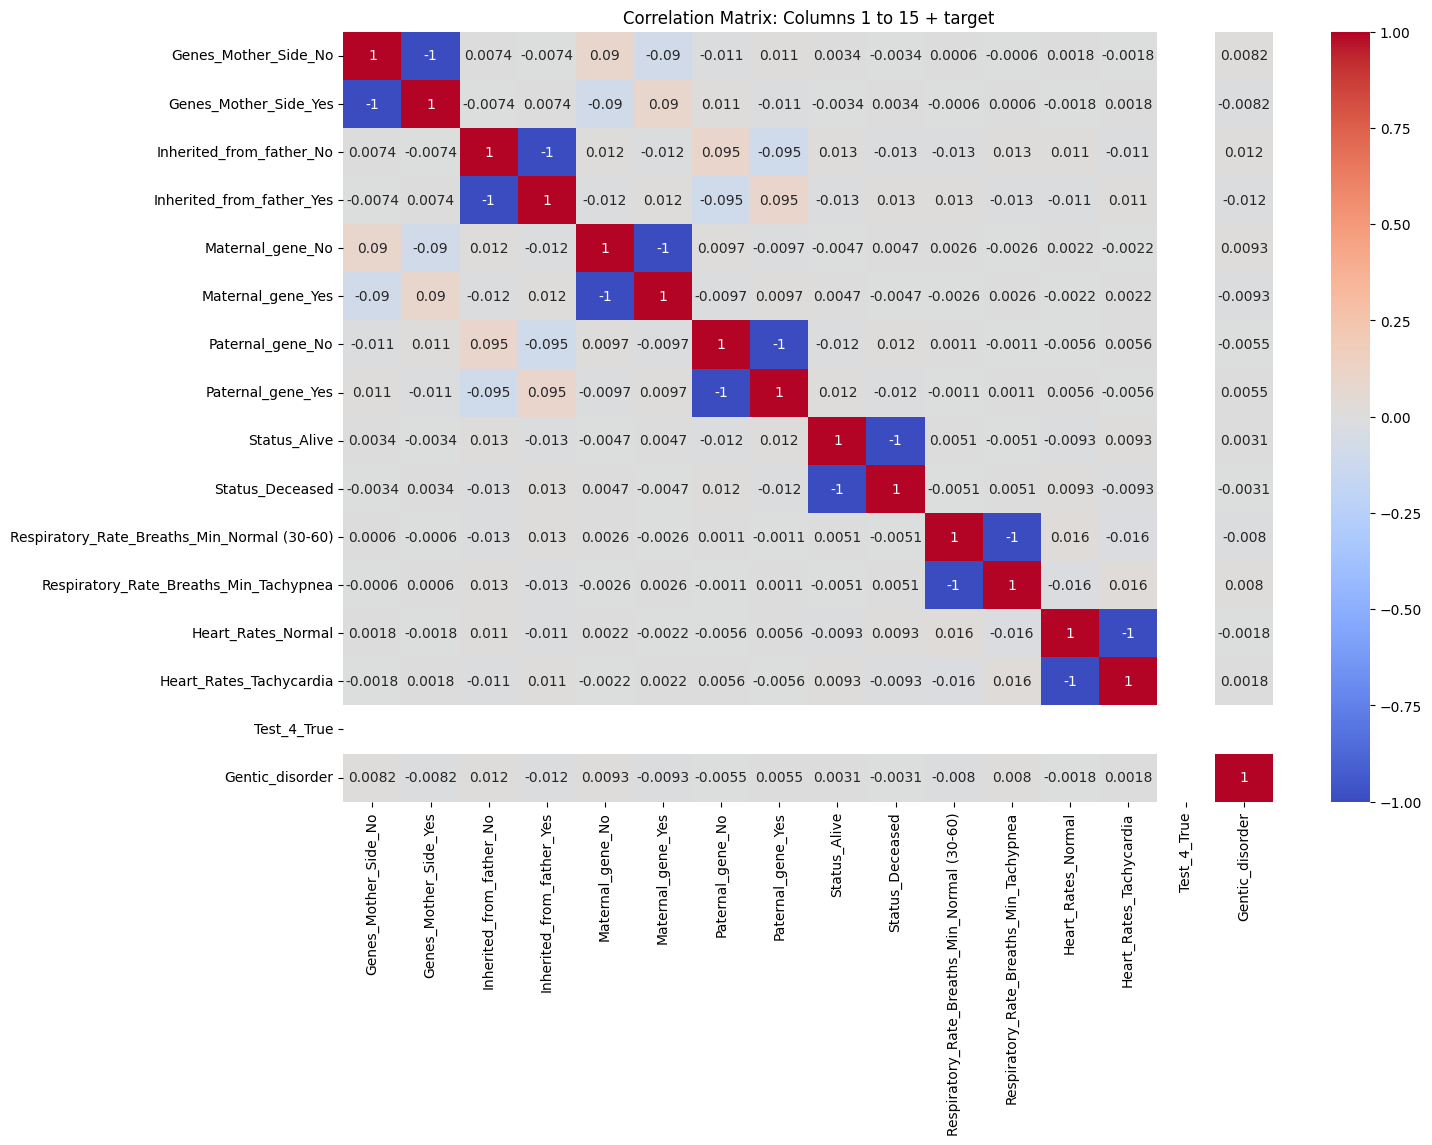

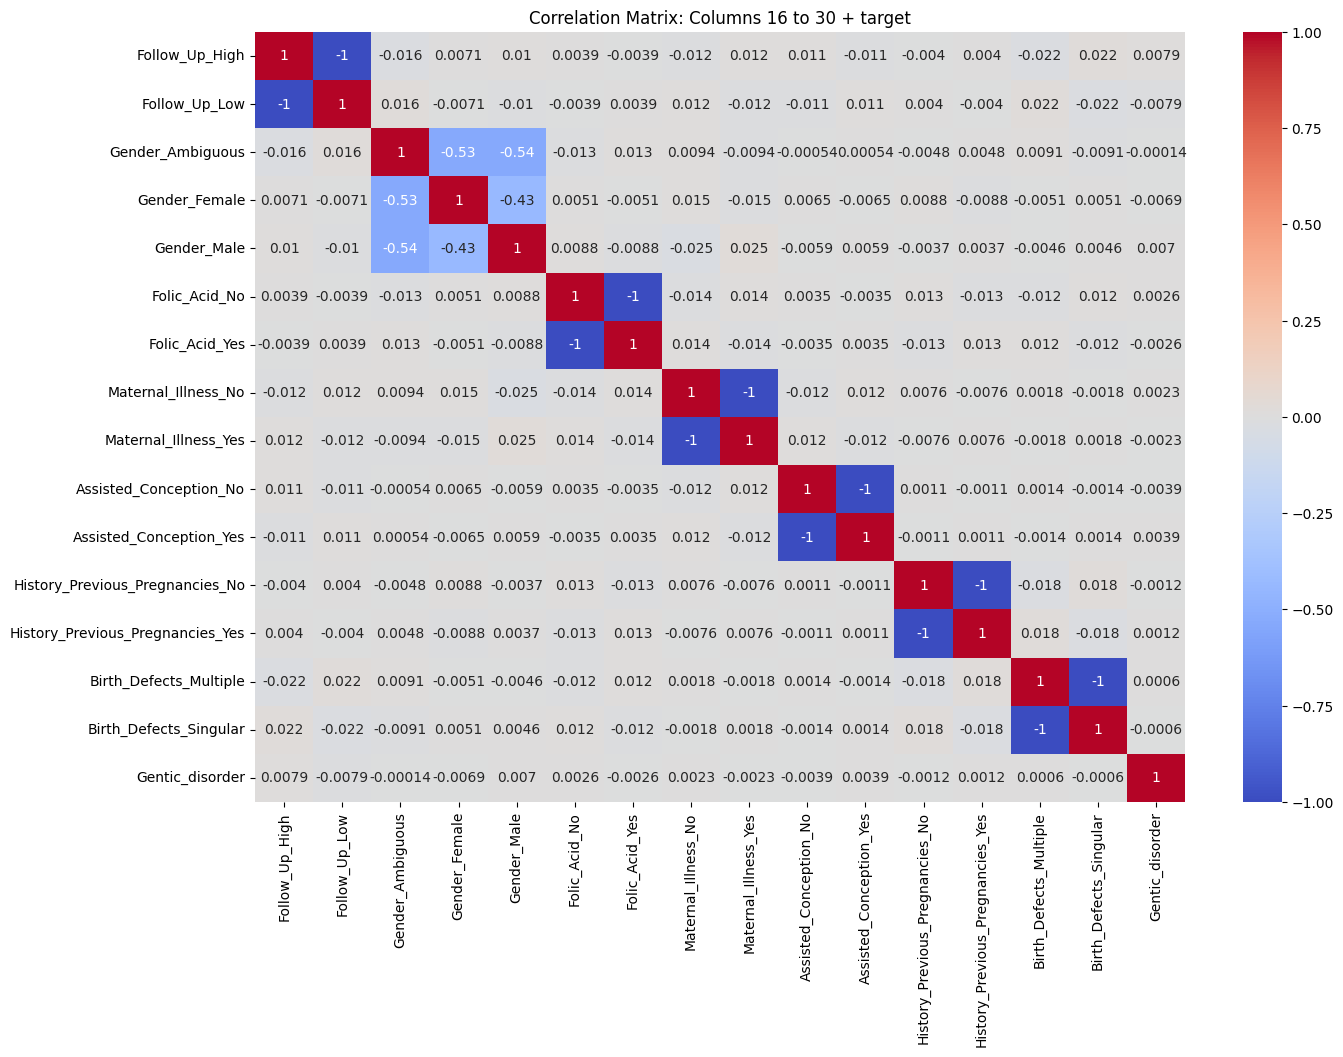

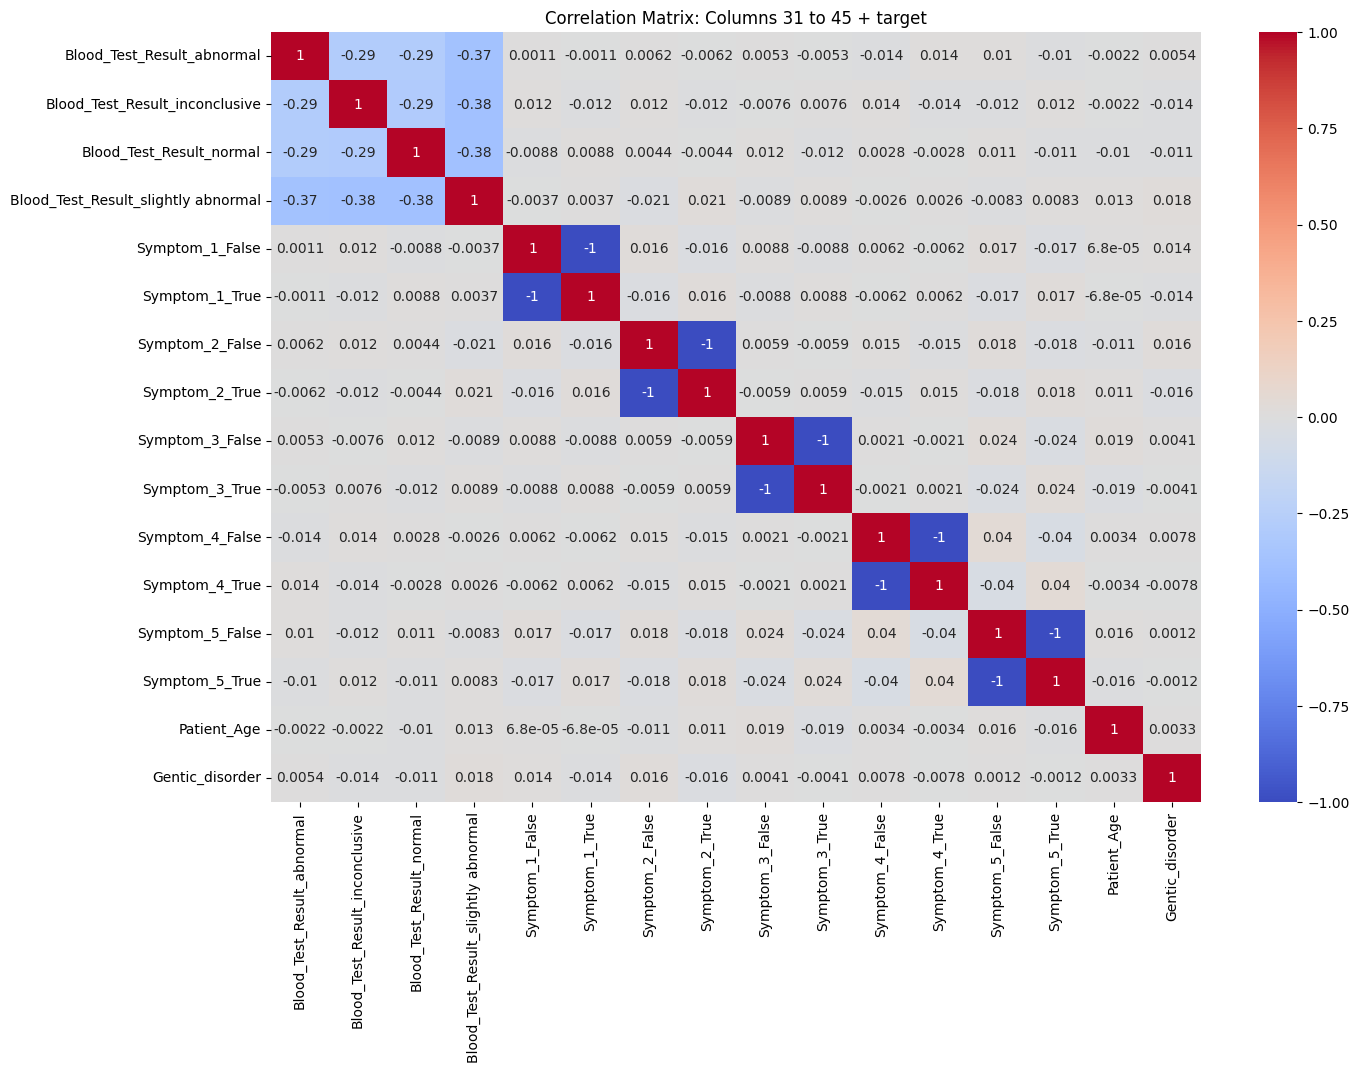

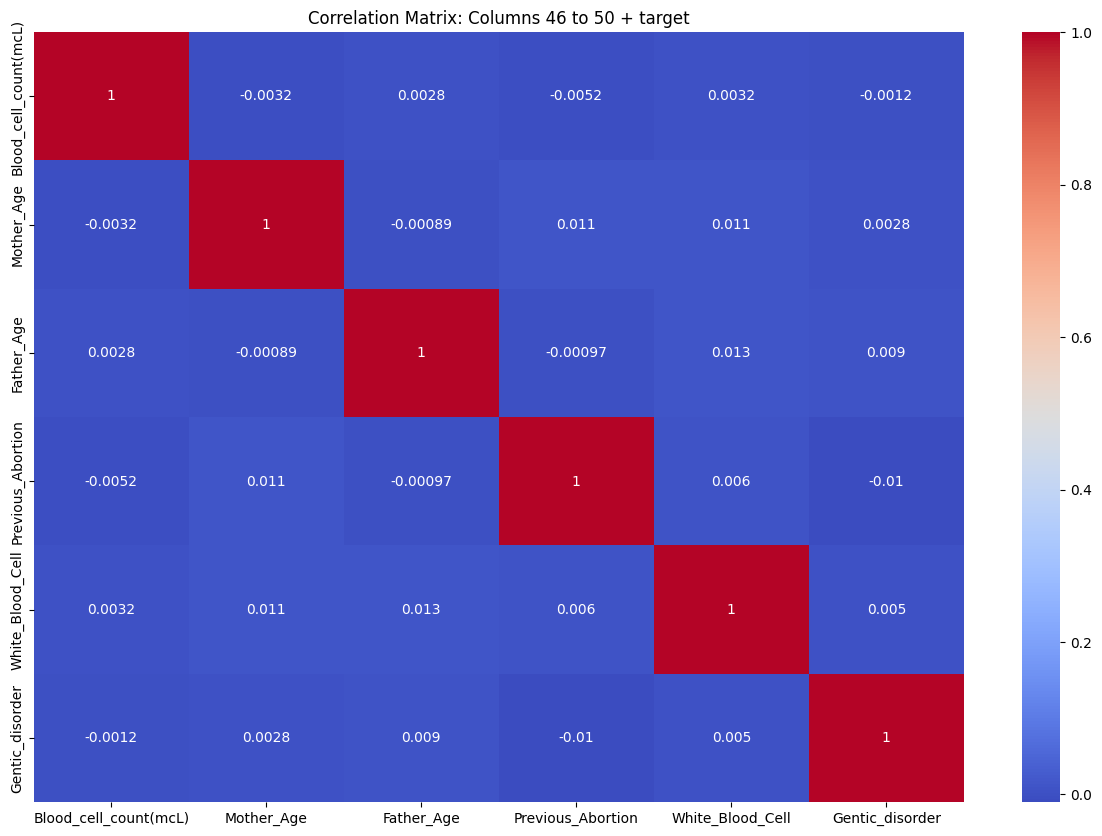

In [46]:
df = X_encoded.copy()
df["Gentic_disorder"] = y_Genetic_Disorder_encoded

chunk_size = 15
n_features = df.shape[1] - 1
feature_names = df.columns.drop("Gentic_disorder")

for i in range(0, n_features, chunk_size):
    subset = df[list(feature_names[i:i+chunk_size]) + ["Gentic_disorder"]]
    corr = subset.corr()

    plt.figure(figsize=(15,10))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix: Columns {i+1} to {min(i+chunk_size, n_features)} + target")
    plt.show()


# Normalizing

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)


In [48]:
X_scaled.head(3)

,Genes_Mother_Side_No,Genes_Mother_Side_Yes,Inherited_from_father_No,Inherited_from_father_Yes,Maternal_gene_No,Maternal_gene_Yes,Paternal_gene_No,Paternal_gene_Yes,Status_Alive,Status_Deceased,...,Symptom_4_False,Symptom_4_True,Symptom_5_False,Symptom_5_True,Patient_Age,Blood_cell_count(mcL),Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
0,-0.82271,0.82271,0.803847,-0.803847,-0.806672,0.806672,0.873033,-0.873033,0.991459,-0.991459,...,-0.916811,0.916811,-0.977962,0.977962,-1.172960,-0.694013,-0.044880,-0.064485,-0.658746,0.938948
1,-0.82271,0.82271,-1.244019,1.244019,1.239660,-1.239660,0.873033,-0.873033,-1.008614,1.008614,...,-0.916811,0.916811,1.022535,-1.022535,-0.696099,0.055005,-0.044880,-1.664000,-0.658746,-0.774993
2,-0.82271,0.82271,0.803847,-0.803847,1.239660,-1.239660,0.873033,-0.873033,0.991459,-0.991459,...,-0.916811,0.916811,-0.977962,0.977962,-0.219238,-0.031701,0.781326,-1.752862,1.523499,-0.000777


### BASELINE

In [49]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

In [50]:
score_baseline_DT = cross_validate(DecisionTreeClassifier(), X_scaled ,  y_Genetic_Disorder_encoded, cv=5, scoring= scoring)
print("Accuracy:", score_baseline_DT['test_accuracy'].mean())
print("Precision:", score_baseline_DT['test_precision'].mean())
print("Recall:", score_baseline_DT['test_recall'].mean())
print("F1 Score:", score_baseline_DT['test_f1'].mean())

Accuracy: 0.4869820074525649
Precision: 0.4252972971856243
Recall: 0.4267841000152478
F1 Score: 0.4258615286716664


### Predict Baseline

In [51]:
X.shape

(19703, 27)

In [52]:
test.shape

(9465, 27)

In [53]:
# OneHotEncoder
X_test_encoded = ohe.transform(test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=all_feature_names)

# StandardScaler
X_test_scaled = scaler.transform(X_test_encoded)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)

In [54]:
from sklearn.metrics import accuracy_score, classification_report
model = DecisionTreeClassifier()
model.fit(X_scaled, y_Genetic_Disorder_encoded)
y_pred = model.predict(X_test_scaled)
y_pred


array([1, 0, 0, ..., 0, 1, 1], shape=(9465,))

In [55]:
y_pred_labels = le.inverse_transform(y_pred)
test_with_pred = test.copy()
test_with_pred['Predicted_Genetic_Disorder'] = y_pred_labels

In [56]:
test_with_pred

,Patient_Age,Genes_Mother_Side,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count(mcL),Mother_Age,Father_Age,Status,Respiratory_Rate_Breaths_Min,...,Previous_Abortion,Birth_Defects,White_Blood_Cell,Blood_Test_Result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Predicted_Genetic_Disorder
0,6.0,No,Yes,No,No,4.981655,38.0,61.0,Alive,Tachypnea,...,2.0,Multiple,-99.000000,slightly abnormal,True,True,True,True,True,Multifactorial genetic inheritance disorders
1,10.0,Yes,No,Yes,Yes,5.118890,33.0,53.0,Alive,Normal (30-60),...,-99.0,Multiple,8.179584,normal,False,False,False,True,False,Mitochondrial genetic inheritance disorders
2,5.0,No,No,No,No,4.876204,48.0,60.0,Deceased,Normal (30-60),...,0.0,Singular,-99.000000,slightly abnormal,False,False,True,True,False,Mitochondrial genetic inheritance disorders
3,13.0,No,Yes,Yes,No,4.687767,25.0,55.0,Alive,Normal (30-60),...,-99.0,Singular,6.884071,normal,True,False,True,False,True,Mitochondrial genetic inheritance disorders
4,5.0,No,No,Yes,Yes,5.152362,41.0,38.0,Deceased,Tachypnea,...,-99.0,Multiple,6.195178,normal,True,True,True,True,False,Mitochondrial genetic inheritance disorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,9.0,Yes,Yes,Yes,No,4.878335,28.0,63.0,Alive,Normal (30-60),...,2.0,Multiple,7.234960,abnormal,False,True,True,True,False,Mitochondrial genetic inheritance disorders
9461,1.0,Yes,No,Yes,Yes,4.927151,37.0,62.0,Deceased,Normal (30-60),...,-99.0,Singular,4.859536,abnormal,False,True,False,True,True,Multifactorial genetic inheritance disorders
9462,2.0,No,Yes,No,No,4.898352,24.0,32.0,Deceased,Tachypnea,...,3.0,Singular,5.696062,normal,False,True,False,False,True,Mitochondrial genetic inheritance disorders
9463,13.0,No,Yes,No,No,4.804840,36.0,56.0,Alive,Normal (30-60),...,1.0,Singular,3.000000,inconclusive,True,True,True,True,True,Multifactorial genetic inheritance disorders


## Make Pipeline

### Define sub-pipelines

In [57]:
preproc_numerical = make_pipeline(
    StandardScaler()
)

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

# Combine into a single preprocessor
preproc = make_column_transformer(
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"])),
    (preproc_categorical, make_column_selector(dtype_include=["object", "string", "bool"])),
    remainder="drop"
)

preproc

,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


### For Featchers

In [58]:
# Fit and transform
X_encoded = preproc.fit_transform(X)

# Get feature names
categorical_cols = X.select_dtypes(include=['object', 'string', 'bool']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

ohe = preproc.named_transformers_['pipeline-2'].named_steps['onehotencoder']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(numeric_cols) + list(ohe_feature_names)

# Convert to DataFrame
X_encoded = pd.DataFrame(X_encoded, columns=all_feature_names)
X_encoded.head(2)

,Patient_Age,Blood_cell_count(mcL),Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell,Genes_Mother_Side_No,Genes_Mother_Side_Yes,Inherited_from_father_No,Inherited_from_father_Yes,...,Symptom_1_False,Symptom_1_True,Symptom_2_False,Symptom_2_True,Symptom_3_False,Symptom_3_True,Symptom_4_False,Symptom_4_True,Symptom_5_False,Symptom_5_True
0,-1.172960,-0.694013,-0.04488,-0.064485,-0.658746,0.938948,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.696099,0.055005,-0.04488,-1.664000,-0.658746,-0.774993,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


### For Target

In [59]:
le = LabelEncoder()
y_Genetic_Disorder_encoded = le.fit_transform(y_Genetic_Disorder)
y_Genetic_Disorder_encoded = pd.Series(y_Genetic_Disorder_encoded)
y_Genetic_Disorder_encoded.value_counts()

0    10069
2     7602
1     2032
Name: count, dtype: int64

## preprocess as fun.

In [60]:
!pip install colorama

In [ ]:
import numpy as np
import pandas as pd

from colorama import Fore, Style

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE


def preprocess_data(X: pd.DataFrame, y: pd.Series = None):
    """
    Preprocess numerical and categorical features and (optionally) apply SMOTE + encode the target.

    - Standardizes numeric columns using StandardScaler
    - One-hot encodes categorical columns (handle_unknown='ignore')
    - Applies BorderlineSMOTE for class balancing (if y is provided)
    - Optionally label-encodes the target y

    Returns
    -------
    X_processed : np.ndarray
        Transformed (and resampled) feature matrix
    y_encoded : np.ndarray or None
        Label-encoded and resampled target (if y is provided)
    preprocessor : ColumnTransformer
        The fitted preprocessing object
    """

    def create_preprocessor() -> ColumnTransformer:
        """
        Create a ColumnTransformer for preprocessing numerical & categorical features.
        """
        # NUMERIC PIPELINE
        numeric_pipe = make_pipeline(
            StandardScaler()
        )

        # CATEGORICAL PIPELINE
        categorical_pipe = make_pipeline(
            OneHotEncoder(handle_unknown="ignore", sparse_output=False)
        )

        # COMBINED PREPROCESSOR
        preprocessor = make_column_transformer(
            (numeric_pipe, make_column_selector(dtype_include=["int64", "float64"])),
            (categorical_pipe, make_column_selector(dtype_include=["object", "string", "bool"])),
            remainder="drop"
        )

        return preprocessor

    print(Fore.BLUE + "\nPreprocessing features..." + Style.RESET_ALL)
    preproc = create_preprocessor()

    # Build full pipeline with SMOTE
    preproc_with_smote = Pipeline([
        ("preprocessor", preproc),
        ("smote", BorderlineSMOTE(random_state=42))
    ])

    y_encoded = None

    if y is not None:
        print(Fore.BLUE + "Encoding target..." + Style.RESET_ALL)
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        print(Fore.BLUE + "Applying SMOTE for class balancing..." + Style.RESET_ALL)
        X_processed, y_resampled = preproc_with_smote.fit_resample(X, y_encoded)
        print(Fore.GREEN + f"✅ X_processed with shape {X_processed.shape}" + Style.RESET_ALL)
        print(Fore.GREEN + f"✅ y_resampled with shape {y_resampled.shape}" + Style.RESET_ALL)
        return X_processed, y_resampled, preproc_with_smote

    else:
        # Only transform features (no SMOTE, no y)
        X_processed = preproc.fit_transform(X)
        print(Fore.GREEN + f"✅ X_processed with shape {X_processed.shape}" + Style.RESET_ALL)
        return X_processed, None, preproc_with_smote


In [66]:
X_processed, y_resampled, preprocessor=preprocess_data(X, y_Genetic_Disorder)


Preprocessing features...
Encoding target...
Applying SMOTE for class balancing...
✅ X_processed with shape (30207, 50)
✅ y_resampled with shape (30207,)


In [67]:
print(y_Genetic_Disorder_encoded.value_counts())
print(pd.Series(y_resampled).value_counts())

0    10069
2     7602
1     2032
Name: count, dtype: int64
0    10069
2    10069
1    10069
Name: count, dtype: int64


In [64]:
preprocessor

,steps,"[('preprocessor', ...), ('smote', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline-1', ...), ('pipeline-2', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Modeling